<a href="https://colab.research.google.com/github/Andrei-Loginov/computational-methods/blob/master/computational_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = sp.symbols('x')
y = sp.symbols('y')

In [0]:
f = sp.tan(x - y - 0.2) - x * y
g = 0.5 * x**2 + 2 * y**2 - 1


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:930: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:931: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom

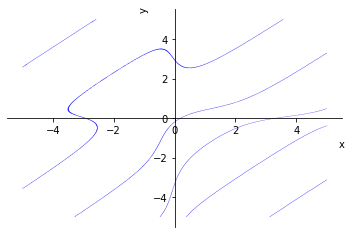

In [0]:
f_plot = sp.plot_implicit(sp.Eq(f,0))

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:930: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(False)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:931: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom

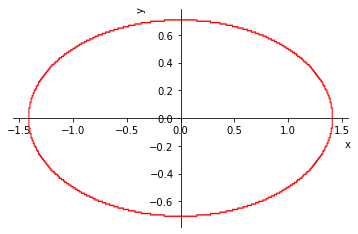

In [0]:
g_plot = sp.plot_implicit(sp.Eq(g, 0), line_color = 'red')

In [0]:
  rows = []

def solve(f, g, x, y, x0, y0):
    dfdx = f.diff(x)
    dfdy = f.diff(y)
    dgdx = g.diff(x)
    dgdy = g.diff(y)
    d = dfdx * dgdy - dgdx * dfdy
    dx = f * dgdy - g * dfdy
    dy = dfdx * g - dgdx * f

    eps = 10**-5
    flag = True
    k = 0
    while True:
        k += 1 
        x_step = (dx / d).subs({x: x0, y: y0})
        y_step = (dy / d).subs({x: x0, y: y0})
        norm = np.linalg.norm([float(x_step), float(y_step)])
        x0 -= x_step
        y0 -= y_step
        rows.append([x0, y0, norm, f.subs({x: x0, y: y0}), g.subs({x: x0, y: y0})])
        if (norm < eps):
          print('Заданная точность достигнута за' , k, 'итераций')
          break
    return (x0, y0)

In [0]:
solve(f, g, x, y, 1, 1)

Заданная точность достигнута за 7 итераций


(1.09950135534698, 0.444718104418450)

In [0]:
pd.DataFrame(rows, columns=['xk', 'yk', 'norm', 'f(xk,yk)', 'g(xk,yk)'])

,xk,yk,norm,"f(xk,yk)","g(xk,yk)"
0,1.79312508422536,0.426718728943661,9.786209e-01,1.57141098528309,0.971826531101685
1,1.36665739607235,0.305376139660293,4.433945e-01,0.747225728628217,0.120385392467271
2,1.18742441942353,0.407352575039675,2.062126e-01,0.171570741954495,0.0368606167045674
3,1.10863732171636,0.442146209916612,8.612783e-02,0.0133796587742399,0.00552489743845919
4,1.09958087136662,0.444699336755802,9.409450e-03,0.000107062516694567,5.40465597825279e-5
5,1.09950136089506,0.444718103162143,8.169512e-05,7.34522692669159e-9,3.86531379126254e-9
6,1.09950135534698,0.444718104418450,5.688542e-09,1.66533453693773e-16,0
